## 14장 베스트모델 만들기

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint # 추가!!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
np.random.seed(3)
tf.random.set_seed(3)

In [ ]:
df_pre = pd.read_csv("wine.csv",header=None)
df = df_pre.sample(frac=1)

In [ ]:
dataset= df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [ ]:
#모델 설정
model = Sequential()
model.add(Dense(30,input_dim = 12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

모델 업데이트

In [ ]:
#모델 저장 폴더 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR): # 없으면 폴더 생성 / 새로고침하면 생성되어있음 확인
  os.mkdir(MODEL_DIR)

#모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1,save_best_only=True)

#모델 실행 및 저장
model.fit(X,Y,epochs=200,validation_split=0.2,batch_size=200,verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.38706, saving model to ./model/01-0.3871.hdf5

Epoch 00002: val_loss improved from 0.38706 to 0.28561, saving model to ./model/02-0.2856.hdf5

Epoch 00003: val_loss improved from 0.28561 to 0.24630, saving model to ./model/03-0.2463.hdf5

Epoch 00004: val_loss improved from 0.24630 to 0.23385, saving model to ./model/04-0.2338.hdf5

Epoch 00005: val_loss improved from 0.23385 to 0.22901, saving model to ./model/05-0.2290.hdf5

Epoch 00006: val_loss improved from 0.22901 to 0.22135, saving model to ./model/06-0.2214.hdf5

Epoch 00007: val_loss improved from 0.22135 to 0.21528, saving model to ./model/07-0.2153.hdf5

Epoch 00008: val_loss improved from 0.21528 to 0.20855, saving model to ./model/08-0.2086.hdf5

Epoch 00009: val_loss improved from 0.20855 to 0.19963, saving model to ./model/09-0.1996.hdf5

Epoch 00010: val_loss improved from 0.19963 to 0.19792, saving model to ./model/10-0.1979.hdf5

Epoch 00011: val_loss improved from 0.19792

#### 오버피팅 방지 - 학습의 자동중단


In [ ]:
model = Sequential()
model.add(Dense(24,input_dim = 12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
checkPointer = ModelCheckpoint(filepath=model_path,monitor='val_loss',verbose=0,save_best_only=True)

hist = model.fit(x_data,y_data,epochs=2000,validation_split=0.2,batch_size=1280,verbose=0,
          callbacks=[checkPointer]) #validation set!

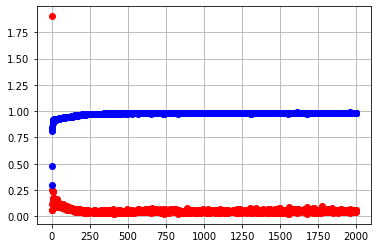

In [ ]:
y_vloss = hist.history['val_loss']
y_acc = hist.history['accuracy']

x_len = np.arange(len(y_acc))
plt.grid(True)
plt.plot(x_len,y_vloss, "ro")
plt.plot(x_len,y_acc,"bo")

## 13 14 장 내용의 종합 

In [ ]:
from sklearn.model_selection import StratifiedKFold as SKfold
from tensorflow.keras.callbacks import EarlyStopping
n_fold = 5 # 5겹 
skf = SKfold(n_splits=n_fold,shuffle=True,random_state=3)

In [ ]:
data = pd.read_csv("wine.csv",header=None)
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [ ]:

accuracy = []
i = 1 
for train,test in skf.split(x_data,y_data):
  # 모델 쌓기
  model = Sequential()
  model.add(Dense(32,input_dim = 12,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  # 모델 컴파일
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  early_stop = EarlyStopping(monitor='val_loss',patience=100,verbose=1)

  # 모델 실행
  model.fit(x_data.iloc[train],y_data[train],epochs=1000,batch_size=256,
            validation_split=0.1,callbacks=[early_stop],verbose = 0) # 쪼개진 train set 에서 또 0.2 정도를 나눔
  # validation set 으로 early stop을 결정 

  # 검증은 테스트 셋으로
  Kth_accuracy = '%.4f'%(model.evaluate(x_data.iloc[test],y_data[test])[1]) # 쪼개진 테스트 데이터로 검증
  print("%d 번째 fold :"%(i),Kth_accuracy)
  i+=1
  accuracy.append(Kth_accuracy)


# 교차 검증 평가
print(accuracy)
print("평균:",np.mean(np.array(accuracy).astype(float)))

Epoch 00205: early stopping
41/41 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9846
1 번째 fold : 0.9846
Epoch 00201: early stopping
41/41 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9815
2 번째 fold : 0.9815
Epoch 00102: early stopping
41/41 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9769
3 번째 fold : 0.9769
Epoch 00317: early stopping
41/41 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9846
4 번째 fold : 0.9846
Epoch 00327: early stopping
41/41 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9869
5 번째 fold : 0.9869
['0.9846', '0.9815', '0.9769', '0.9846', '0.9869']
평균: 0.9829000000000001


[Train , Test , Validation set 차이](https://ganghee-lee.tistory.com/38)

kfold 로 Train ,test 로 나눠서  train으로 학습, test로 평가

나눠진 train 으로 train/validation 으로 또 나눔 (validataion_split)

이 나눠진 validataion set 으로 

validation_loss 를 모니터링하여 

early stopping 여부를 결정